In [1]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests

In [5]:
# fetch the contents from the URL
# Create an URL object
url = 'https://www.worldometers.info/coronavirus/'
# Create object page
page = requests.get(url)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
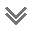

In [6]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')
soup

In [7]:
# Obtain information from tag <table>
# Use the google inspect tool for that
table1 = soup.find('table', id='main_table_countries_today')
table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [8]:
# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [9]:
# Create a DataFrame with columns as headers of data obtained
mydata = pd.DataFrame(columns = headers)

In [10]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(mydata)
    mydata.loc[length] = row

In [11]:
# Let's see the some rows of data
mydata.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"95,811,161","+6,033","1,424,946",+260,"69,316,057","+6,153","25,070,158","9,587",...,,,,North America,\n,,,,,
1,,\nAsia\n,"128,317,988","+501,124","1,376,877",+800,"113,480,787","+133,902","13,460,324","28,858",...,,,,Asia,\n,,,,,
2,,\nSouth America\n,"55,352,903",+529,"1,269,025",+2,"50,327,496","+1,533","3,756,382","12,367",...,,,,South America,\n,,,,,
3,,\nEurope\n,"167,080,448","+463,533","1,744,869","+1,427","147,863,163","+535,458","17,472,416","11,727",...,,,,Europe,\n,,,,,
4,,\nOceania\n,"4,390,529","+78,382","8,340",+30,"3,802,031","+15,278","580,158",155,...,,,,Australia/Oceania,\n,,,,,


In [12]:
# Drop and clearing unnecessary rows
mydata.drop(mydata.index[0:7], inplace=True)
mydata.drop(mydata.index[222:229], inplace=True)
mydata.reset_index(inplace=True, drop=True)
# Drop “#” column
mydata.drop('#', inplace=True, axis=1)

In [13]:
# Final data obtained
mydata.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"462,599,610","+1,049,952","6,075,889","+2,526","395,598,044","+694,812","60,925,677","64,201","59,347",...,,,,All,\n,,,,,
1,USA,"81,244,936",,"992,302",,"56,456,450",,"23,796,184","3,726","243,030",...,"967,406,638","2,893,828","334,300,023",North America,4,337,0,,,"71,182"
2,India,"42,998,938",,"516,103",,"42,450,055",,"32,780","8,944","30,647",...,"780,506,974","556,293","1,403,050,615",Asia,33,"2,719",2,,,23
3,Brazil,"29,432,274",,"655,649",,"27,968,811",,"807,814","8,318","136,814",...,"63,776,166","296,459","215,126,183",South America,7,328,3,,,"3,755"
4,France,"23,649,615",,"140,440",,"22,327,799",,"1,181,376","1,783","360,959",...,"246,629,975","3,764,257","65,518,893",Europe,3,467,0,,,"18,031"


In [17]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country,Other        229 non-null    object
 1   TotalCases           229 non-null    object
 2   NewCases             229 non-null    object
 3   TotalDeaths          229 non-null    object
 4   NewDeaths            229 non-null    object
 5   TotalRecovered       229 non-null    object
 6   NewRecovered         229 non-null    object
 7   ActiveCases          229 non-null    object
 8   Serious,Critical     229 non-null    object
 9   Tot Cases/1M pop     229 non-null    object
 10  Deaths/1M pop        229 non-null    object
 11  TotalTests           229 non-null    object
 12  Tests/
1M pop
       229 non-null    object
 13  Population           229 non-null    object
 14  Continent            229 non-null    object
 15  1 Caseevery X ppl    229 non-null    object
 16  1 Deathe

In [ ]:
# fetch the contents from the URL
# Create an URL object
url = 'https://www.olx.in/items/q-car?isSearchCall=true'
# Create object page
page = requests.get(url)

In [2]:
import selenium
import time

In [1]:
from selenium import webdriver

In [28]:
search_query = 'https://www.indeed.com/q-data-scientist-jobs.html'
driver = webdriver.Chrome(executable_path='D:\Softwares\chromedriver_win32\chromedriver.exe')
job_details = []

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


In [18]:
for each_job in job_list:
    # Getting job info
    job_title = each_job.find_elements_by_xpath(".//h2[@class='title']/a")[0]
    job_company = each_job.find_elements_by_xpath(".//span[@class='company']")[0]
    job_location = each_job.find_elements_by_xpath(".//span[@class='location accessible-contrast-color-location']")[0]
    job_summary = each_job.find_elements_by_xpath(".//div[@class='summary']")[0]
    job_publish_date = each_job.find_elements_by_xpath(".//span[@class='date ']")[0]
    # Saving job info 
    job_info = [job_title.text, job_company.text, job_location.text, job_summary.text, job_publish_date.text]
    # Saving into job_details
    job_details.append(job_info)

In [ ]:
job_details_df = pd.DataFrame(job_details)
job_details_df.columns = ['title', 'company', 'location', 'summary', 'publish_date']

## selenium practise

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

import pandas as pd

In [30]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.worldometers.info/coronavirus/')
driver.maximize_window()



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been s

In [31]:
thead_data = driver.find_elements(by = By.XPATH,value="//table[@id='main_table_countries_today']/thead")
tbody_data = driver.find_elements(by = By.XPATH,value="//table[@id='main_table_countries_today']/tbody/tr")

In [32]:
print('length of table head data : ',len(thead_data))
print('length of table body data : ',len(tbody_data))

length of table head data :  1
length of table body data :  243


In [33]:
print('attribute in table')
attributes = []
for i in thead_data:
    print(i.text)
    attributes.append(i.text)

attribute in table
# Country,
Other Total
Cases New
Cases Total
Deaths New
Deaths Total
Recovered New
Recovered Active
Cases Serious,
Critical Tot Cases/
1M pop Deaths/
1M pop Total
Tests Tests/
1M pop Population


In [34]:
data = pd.DataFrame(columns = attributes)

In [ ]:
records = []
for i in tbody_data:
    country = i.find_elements_by_xpath(".//h2[@class='title']/a")[0]
    other_total = i.find_elements_by_xpath(".//span[@class='company']")[0]
    new_cases = i.find_elements_by_xpath(".//span[@class='location accessible-contrast-color-location']")[0]
    total_cases = i.find_elements_by_xpath(".//div[@class='summary']")[0]
    new_deaths = i.find_elements_by_xpath(".//span[@class='date ']")[0]
    total_deaths = i.find_elements_by_xpath(".//span[@class='date ']")[0]
    new_recovered = i.find_elements_by_xpath(".//span[@class='date ']")[0]
    active-recovered = i.find_elements_by_xpath(".//span[@class='date ']")[0]
    serious_cases = i.find_elements_by_xpath(".//span[@class='date ']")[0]
    critical_cases = i.find_elements_by_xpath(".//span[@class='date ']")[0]
    1M_pop_deaths = i.find_elements_by_xpath(".//span[@class='date ']")[0]
    1M_pop_total = i.find_elements_by_xpath(".//span[@class='date ']")[0]
    tests = i.find_elements_by_xpath(".//span[@class='date ']")[0]
    1M_pop_population = i.find_elements_by_xpath(".//span[@class='date ']")[0]
    # Saving job info 
    job_info = [job_title.text, job_company.text, job_location.text, job_summary.text, job_publish_date.text]
    # Saving into job_details
    job_details.append(job_info)

In [35]:
for i in tbody_data:
    print(i.text)

World 466,535,026 +560,494 6,088,152 +775 398,154,316 +355,912 62,292,558 63,210 59,852 781.1



1 USA 81,350,883 996,072 56,822,580 23,532,231 3,471 243,339 2,979 969,701,073 2,900,599 334,310,610

2 India 43,004,005 516,312 42,458,543 29,150 8,944 30,649 368 781,224,304 556,775 1,403,124,696
3 Brazil 29,527,640 656,487 28,126,647 744,506 8,318 137,252 3,052 63,776,166 296,448 215,134,427
4 France 23,860,194 140,729 22,452,380 1,267,085 1,695 364,168 2,148 246,629,975 3,764,212 65,519,680
5 UK 20,001,627 163,386 18,507,001 1,331,240 281 292,021 2,385 494,375,963 7,217,824 68,493,770
6 Germany 18,140,525 127,072 14,323,500 +181,000 3,689,953 2,494 215,342 1,508 104,701,826 1,242,891 84,240,536
7 Russia 17,484,257 363,039 15,934,645 1,186,573 2,300 119,721 2,486 273,400,000 1,872,076 146,041,114
8 Turkey 14,644,382 96,954 14,271,428 276,000 975 170,510 1,129 149,811,965 1,744,322 85,885,515
9 Italy 13,645,834 157,442 12,400,175 1,088,217 473 226,260 2,611 194,373,101 3,222,884 60,310,29

96 Réunion 318,695 689 306,072 11,934 41 351,682 760 1,535,875 1,694,850 906,201
97 Zambia 315,623 3,962 310,706 955 1 16,387 206 3,322,571 172,507 19,260,476
98 North Macedonia 302,548 9,162 291,431 1,955 145,230 4,398 1,904,444 914,179 2,083,228
99 Albania 272,885 3,487 268,764 634 13 95,001 1,214 1,762,808 613,697 2,872,441
100 Algeria 265,511 6,870 178,137 80,504 8 5,874 152 230,861 5,108 45,199,871
101 Botswana 263,950 2,619 259,434 1,897 1 108,510 1,077 2,026,898 833,257 2,432,499
102 Nigeria 255,092 3,142 249,457 2,493 11 1,187 15 4,589,725 21,364 214,839,323
103 Zimbabwe 244,012 5,420 233,461 5,131 12 16,020 356 2,149,854 141,145 15,231,547
104 Uzbekistan 237,384 1,637 234,860 887 23 6,922 48 1,377,915 40,178 34,295,617
105 Montenegro 231,927 2,696 228,450 781 60 369,192 4,292 1,193,819 1,900,377 628,201
106 Mozambique 225,200 2,199 221,989 1,012 13 6,877 67 1,287,004 39,302 32,746,221
107 Kyrgyzstan 200,787 +11 2,977 +1 196,016 +31 1,794 131 29,934 444 1,907,195 284,335 6,707,

209 Kiribati 3,041 13 2,478 550 9 24,810 106 122,571
210 Tonga 2,788 +258 2 964 +68 1,822 25,878 19 84,463 783,981 107,736
211 Anguilla 2,595 9 2,572 14 4 170,376 591 51,382 3,373,515 15,231
212 Saint Pierre Miquelon 1,693 1 1,217 475 1 294,640 174 17,358 3,020,884 5,746

213 Diamond Princess 712 13 699 0
214 Cook Islands 604 174 430 34,336 4,467 253,937 17,591
215 Vanuatu 473 1 59 413 2 1,481 3 24,976 78,205 319,367
216 Wallis and Futuna 454 7 438 9 41,636 642 20,508 1,880,778 10,904
217 Montserrat 174 2 163 9 34,821 400 8,359 1,672,804 4,997
218 Falkland Islands 118 N/A N/A N/A 32,311 8,632 2,363,636 3,652
219 Macao 82 79 3 123 5,318 8,004 664,416
220 Samoa 49 28 21 244 200,661
221 Vatican City 29 28 1 36,070 804
222 Western Sahara 10 1 8 1 16 2 622,347
223 MS Zaandam 9 2 7 0
224 Marshall Islands 7 7 0 117 59,871
225 Saint Helena 2 2 0 327 6,108
226 Micronesia 1 1 0 9 117,078
227 Niue 1 1 608 1,645







Total: 466,535,026 +560,494 6,088,152 +775 398,154,316 +355,912 62,292,558 63,2

## selenium real-data

### https://business.mapsofindia.com/india-company/

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://business.mapsofindia.com/india-company/')
driver.maximize_window()

'''executable_path='D:\Softwares\chromedriver_win32\chromedriver.exe'
   DeprecationWarning: executable_path has been deprecated, please pass in a Service object
'''



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been s

"executable_path='D:\\Softwares\\chromedriver_win32\\chromedriver.exe'\n   DeprecationWarning: executable_path has been deprecated, please pass in a Service object\n"

In [33]:
thead_data = driver.find_elements(by = By.XPATH,value="//table[@class='tableizer-table']/tbody/tr[@class='tableizer-firstrow']")
tbody_data = driver.find_elements(by = By.XPATH,value="//table[@class='tableizer-table']/tbody/tr/td")

'''ref : https://selenium-python.readthedocs.io/locating-elements.html'''

'ref : https://selenium-python.readthedocs.io/locating-elements.html'

In [16]:
print('length of table head data : ',len(thead_data))
print('length of table body data : ',len(tbody_data))

length of table head data :  1
length of table body data :  592


In [17]:
print('attribute in table')
attributes = []
for i in thead_data:
    print(i.text)
    attributes.append(i.text)

attribute in table
58 Indian companies in Forbes Global 2000 list 2017


In [45]:
tbody_data[500].text

'24'

In [46]:
data = []
attributes = []
temp = []
c = 0
att = True
for i in tbody_data:
    c+=1
    if c>5:
        if att:
            attributes.append(temp)
            att = False
        data.append(temp)
        temp = []
        c = 0
        if len(data)==59:
            break
    else:
        temp.append(i.text)

In [86]:
data[:5]

[['Global Rank', 'Indian Companies', 'Sales', 'Profits', 'Assets'],
 ['#106', 'Reliance Industries', '$41.8 B', '$4.3 B', '$97.9 B'],
 ['#244', 'State Bank of India', '$43.7 B', '$667 M', '$493.3 B'],
 ['#246', 'Oil & Natural Gas', '$19.9 B', '$2.2 B', '$57.7 B'],
 ['#258', 'HDFC Bank', '$11.4 B', '$2 B', '$110.3 B']]

In [141]:
df = pd.DataFrame(columns=data[0])

In [142]:
for i in data[1:]:
    df.loc[len(df.index)] = i

In [248]:
df.head()

,Global Rank,Indian Companies,Sales,Profits,Assets
0,106,Reliance Industries,4.180000e+10,4.300000e+09,9.790000e+10
1,244,State Bank of India,4.370000e+10,6.670000e+08,4.933000e+11
2,246,Oil & Natural Gas,1.990000e+10,2.200000e+09,5.770000e+10
3,258,HDFC Bank,1.140000e+10,2.000000e+09,1.103000e+11
4,264,Indian Oil,5.410000e+10,1.700000e+09,3.730000e+10


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Global Rank       58 non-null     int64  
 1   Indian Companies  58 non-null     object 
 2   Sales             58 non-null     float64
 3   Profits           58 non-null     float64
 4   Assets            58 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.7+ KB


In [144]:
df['Global Rank'] = [int(i[1:]) for i in df['Global Rank']]

In [145]:
df['Sales'] = [float(i[1:-2])*10**9 if i[-1]=='B' else float(i[1:-2])*10**6 for i in df['Sales']]

In [146]:
df['Profits'] = [float(i[1:-2])*10**9 if i[-1]=='B' else float(i[1:-2])*10**6 for i in df['Profits']]

In [147]:
df['Assets'] = [float(i[1:-2])*10**9 if i[-1]=='B' else float(i[1:-2])*10**6 for i in df['Assets']]

In [148]:
df.describe()

,Global Rank,Sales,Profits,Assets
count,58.000000,5.800000e+01,5.800000e+01,5.800000e+01
mean,1136.655172,1.080172e+10,6.678103e+08,4.325690e+10
std,581.369573,1.179916e+10,1.007825e+09,6.804614e+10
min,106.000000,1.200000e+09,-9.480000e+08,1.700000e+09
25%,586.750000,3.550000e+09,4.450000e+07,1.212500e+10
50%,1202.500000,6.200000e+09,4.710000e+08,3.025000e+10
75%,1653.500000,1.177500e+10,1.175000e+09,4.467500e+10
max,1998.000000,5.410000e+10,4.300000e+09,4.933000e+11


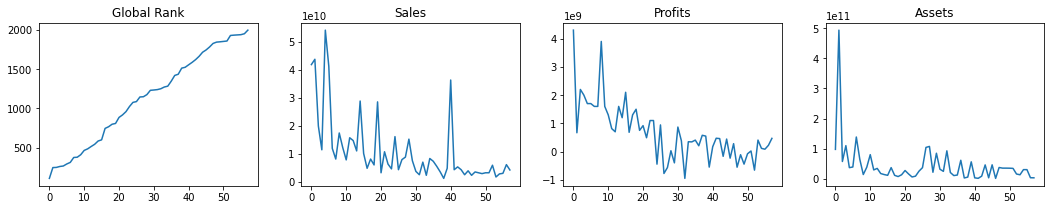

In [123]:
fig1, ax1 = plt.subplots(1,4, figsize=(18,3))
c = 0
for i in df.columns:
    if df[i].dtype in ['float','int64']:
        ax1[c].plot(df[i])
        ax1[c].set_title(i)
        c+=1

In [125]:
df.corr()

,Global Rank,Sales,Profits,Assets
Global Rank,1.000000,-0.604238,-0.727558,-0.343861
Sales,-0.604238,1.000000,0.451547,0.380305
Profits,-0.727558,0.451547,1.000000,0.022177
Assets,-0.343861,0.380305,0.022177,1.000000


In [151]:
df.to_csv('business.mapofIndia.csv',index=False)

In [149]:
#driver.close()

## selenium real-data

### https://www.moneycontrol.com/stocks/marketinfo/interest/bse/index.html

In [153]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.moneycontrol.com/stocks/marketinfo/interest/bse/index.html')
driver.maximize_window()

'''executable_path='D:\Softwares\chromedriver_win32\chromedriver.exe'
   DeprecationWarning: executable_path has been deprecated, please pass in a Service object
'''



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been s

"executable_path='D:\\Softwares\\chromedriver_win32\\chromedriver.exe'\n   DeprecationWarning: executable_path has been deprecated, please pass in a Service object\n"

In [162]:
companies = driver.find_elements(by = By.XPATH,value="//div[@class='lftmenu']/ul/li")

In [171]:
attributes = driver.find_elements(by = By.XPATH,value="//table[@class='tbldata14 bdrtpg']/tbody/tr/th")

In [167]:
data = driver.find_elements(by = By.XPATH,value="//table[@class='tbldata14 bdrtpg']/tbody/tr/td")

In [176]:
attributes[1].text

'Company'

In [182]:
data_ = []
attributes_ = [i.text for i in attributes]
temp = []
c = 0
att = True
for i in data:
    c+=1
    if c>7:
        data_.append(temp)
        temp = []
        c = 0
        temp.append(i.text)
        c+=1
    else:
        temp.append(i.text)

In [231]:
df1 = pd.DataFrame(columns=attributes_)

In [232]:
for i in data_:
    df1.loc[len(df1.index)] = i

In [233]:
df1.head()

,Sr,Company,Last Price,Change,% Chg,Interest,% of Net\nSales
0,1,SBI,501.75,9.20,1.87,154440.63,58.25
1,2,HDFC Bank,"1,480.25",32.40,2.24,55978.66,46.32
2,3,PNB,36.00,0.10,0.28,50272.79,62.26
3,4,Canara Bank,226.00,1.95,0.87,45177.62,65.25
4,5,Union Bank,39.95,-0.05,-0.13,44078.91,64.10


In [239]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sr              99 non-null     int64  
 1   Company         99 non-null     object 
 2   Last Price      99 non-null     float64
 3   Change          99 non-null     object 
 4   % Chg           99 non-null     float64
 5   Interest        99 non-null     object 
 6   % of Net
Sales  99 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.2+ KB


In [235]:
df1['Sr'] = pd.to_numeric(df1['Sr'])

In [236]:
df1['Last Price'] =  [int(''.join(l))+int(k)/100 for l,k in [(j.split(','),k) for j,k in [i.split('.') for i in df1['Last Price']]]]

In [240]:
df1['Change'] = pd.to_numeric(df1['Change'])

In [238]:
df1['% Chg'] = pd.to_numeric(df1['% Chg'])

In [242]:
df1['Interest'] =  [int(''.join(l))+int(k)/100 for l,k in [(j.split(','),k) for j,k in [i.split('.') for i in df1['Interest']]]]

In [244]:
df1['% of Net\nSales'] =  [int(''.join(l))+int(k)/100 for l,k in [(j.split(','),k) for j,k in [i.split('.') for i in df1['% of Net\nSales']]]]

In [245]:
df1.head()

,Sr,Company,Last Price,Change,% Chg,Interest,% of Net\nSales
0,1,SBI,501.75,9.20,1.87,154440.63,58.25
1,2,HDFC Bank,1480.25,32.40,2.24,55978.66,46.32
2,3,PNB,36.00,0.10,0.28,50272.79,62.26
3,4,Canara Bank,226.00,1.95,0.87,45177.62,65.25
4,5,Union Bank,39.95,-0.05,-0.13,44078.91,64.10


In [246]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sr              99 non-null     int64  
 1   Company         99 non-null     object 
 2   Last Price      99 non-null     float64
 3   Change          99 non-null     float64
 4   % Chg           99 non-null     float64
 5   Interest        99 non-null     float64
 6   % of Net
Sales  99 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.2+ KB


In [247]:
df1.to_csv('moneycontrol.csv',index=False)

## selenium data using CIN automate

### https://www.zaubacorp.com/

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('non_profit_making_companies.csv',index_col=0)

In [3]:
data.head()

,CIN,COMPANY_NAME,DATE OF\nREGISTRATION,COMPANY ADDRESS
Sl.No.,,,,
1,U91110AP1918NPL000029,THE COCONADA CHAMBER OF COMMERCE,1918-01-31 00:00:00,"26/9/16, RAMA RAO STREET,GANDHI NAGAR, VIJAYAW..."
2,U80100TG1992NPL014292,NAGARJUNA FOUNDATION,1992-05-27 00:00:00,"NAGARJUNA HILLS,PANJAGUTTA,HYDERABAD HYDERABAD..."
3,U92140TG1993NPL015662,AUROBHARATHI DEVELOPMENT FOUNDATION,1993-04-20 00:00:00,"GADDIPLLI [PO], GAREDIPALLI[M]NALGONDA DIST.\..."
4,U80101TG1995NPL022410,K V K RAJU INTERNATIONAL LEADERSHIP ACADEMY,1995-11-28 00:00:00,"NAGARJUNA HILLS, PANJAGUTTA,HYDERABAD, ANDHRA\..."
5,U85110TG1997NPL027669,RAVINDRANATH MEDICAL FOUNDATION,1997-08-04 00:00:00,"PLOT NO.303, ROAD NO.25,JUBILEE HILLS HYDERABA..."


In [6]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.zaubacorp.com/')
driver.maximize_window()



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been s

In [7]:
from selenium.webdriver.common.keys import Keys

'''ref : https://stackoverflow.com/questions/18557275/how-to-locate-and-insert-a-value-in-a-text-box-input-using-python-selenium'''

'ref : https://stackoverflow.com/questions/18557275/how-to-locate-and-insert-a-value-in-a-text-box-input-using-python-selenium'

In [8]:
inputElement = driver.find_element_by_id('searchid')
inputElement.send_keys('U85110TG1997NPL027669')#U85110TG1997NPL027669
inputElement.send_keys(Keys.ENTER)#inputElement.submit() 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


In [13]:
temp = []
c=0
for i in data['CIN']:
    inputElement = driver.find_element_by_id('searchid')
    inputElement.send_keys(i)#U85110TG1997NPL027669
    inputElement.send_keys(Keys.ENTER)
    
    table1 = driver.find_elements(by = By.XPATH,value="//table[@class='table table-striped']/tbody/tr")
    l = []
    for j,k in zip(table1,range(11)):
        l.append(j.text)
    l1 = []
    for s in l:
        a = s.split('\n')
        l1.append(a[1])
    temp.append(l1)
    c +=1
    if c==10:
        break

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  after removing the cwd from sys.path.


In [14]:
temp

[['THE COCONADA CHAMBER OF COMMERCE',
  'Active',
  'RoC-Vijayawada',
  '29',
  'Company Limited by Guarantee',
  'Non-govt company',
  'Public',
  '31 January 1918',
  '104 years, 1 month, 23 days',
  'Activities of business, employers and professional organisations',
  '9'],
 ['NAGARJUNA FOUNDATION',
  'Active',
  'RoC-Hyderabad',
  '14292',
  'Company limited by Shares',
  'Non-govt company',
  'Private',
  '27 May 1992',
  '29 years, 9 month, 27 days',
  'Primary education',
  '-'],
 ['AUROBHARATHI DEVELOPMENT FOUNDATION',
  'Active',
  'RoC-Hyderabad',
  '15662',
  'Company Limited by Guarantee',
  'Non-govt company',
  'Public',
  '20 April 1993',
  '28 years, 11 month, 3 days',
  'Motion picture, radio, television and other entertainment activities',
  '-'],
 ['K V K RAJU INTERNATIONAL LEADERSHIP LIMITED',
  'Active',
  'RoC-Hyderabad',
  '22410',
  'Company limited by Shares',
  'Non-govt company',
  'Public',
  '28 November 1995',
  '26 years, 3 month, 25 days',
  'Wholesale o

In [42]:
driver.quit()